In [53]:
import numpy as np
import pandas as pd
import json
import requests

pd.options.display.max_rows = 15
np.set_printoptions(precision=4, suppress=True)

In [54]:
#PLOS API URL collection - Information Sciences

#First 5 years after the policy introduction
DA1 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2014-03-04T00:00:00Z TO 2015-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA2 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2015-03-04T00:00:00Z TO 2016-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA3 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2016-03-04T00:00:00Z TO 2017-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA4 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2017-03-04T00:00:00Z TO 2018-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA5 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2018-03-04T00:00:00Z TO 2019-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'

#5 Years leading up to the policy introduction
NO_DA5 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2009-03-01T00:00:00Z TO 2010-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA4 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2010-03-01T00:00:00Z TO 2011-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA3 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2011-03-01T00:00:00Z TO 2012-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA2 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2012-03-01T00:00:00Z TO 2013-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA1 = 'http://api.plos.org/search?q=subject_level_1:"Social sciences" AND everything:10.1371 AND publication_date:[2013-03-01T00:00:00Z TO 2014-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'


In [48]:
#Get the total number of found publications for each year (Information Sciences)

def get_numfound(API_URL):
    url = API_URL
    resp = requests.get(url)
    data = resp.json()
    data = data['response']
    data = data['numFound']
    
    return data

numFound = []

numFound.append(get_numfound(NO_DA5))
numFound.append(get_numfound(NO_DA4))
numFound.append(get_numfound(NO_DA3))
numFound.append(get_numfound(NO_DA2))
numFound.append(get_numfound(NO_DA1))

numFound.append(get_numfound(DA1))
numFound.append(get_numfound(DA2))
numFound.append(get_numfound(DA3))
numFound.append(get_numfound(DA4))
numFound.append(get_numfound(DA5))
    
print(numFound)

[1027, 1478, 2828, 4767, 6222, 5438, 7061, 5343, 5197, 5734]


In [51]:
#Display results in a Pandas DataFrame

yearsNODA = ["09-10", "10-11", "11-12", "12-13", "13-14"]

NumFoundTableNO_DA = pd.DataFrame(list(zip(numFound[0:5])), 
               columns =['Total Publications'], index= yearsNODA) 

NumFoundTableNO_DA

,Total Publications
09-10,1027
10-11,1478
11-12,2828
12-13,4767
13-14,6222


In [52]:
#Display results in a Pandas DataFrame

yearsDA = ["14-15", "15-16", "16-17", "17-18", "18-19"]

NumFoundTableDA = pd.DataFrame(list(zip(numFound[5:10])), 
               columns =['Total Publications'], index= yearsDA) 

NumFoundTableDA

,Total Publications
14-15,5438
15-16,7061
16-17,5343
17-18,5197
18-19,5734


In [53]:
#Pandas DataFrame of the entire ten year period 

cont_years = ["09-10", "10-11", "11-12", "12-13", "13-14","14-15", "15-16", "16-17", "17-18", "18-19"]

NumFoundTable = pd.DataFrame(list(zip(numFound)), 
               columns =['Total Publications'], index= cont_years) 

NumFoundTable



,Total Publications
09-10,1027
10-11,1478
11-12,2828
12-13,4767
13-14,6222
14-15,5438
15-16,7061
16-17,5343
17-18,5197
18-19,5734


Text(4.1, 4000, 'Policy implementation')

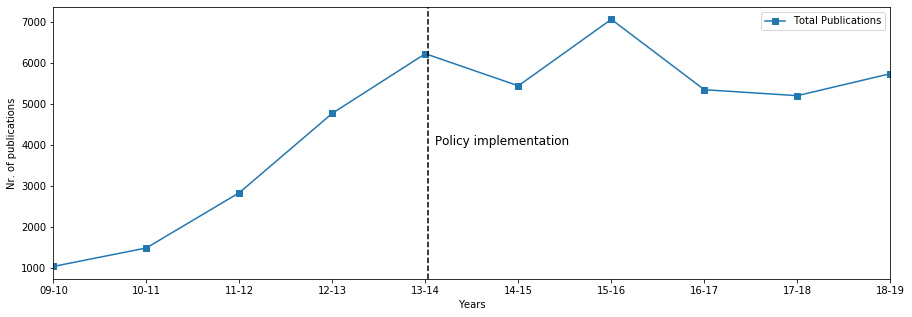

In [59]:
#The Pandas DataFrame of the previous cell, displayed as a line plot (Information Sciences)

plot = NumFoundTable.plot.line(figsize=(15,5), marker="s")
plot.set_xlabel("Years")
plot.set_ylabel("Nr. of publications")
plot.axvline(x=4.025, color="black", linestyle="--")
plot.text(4.10, 4000, "Policy implementation", horizontalalignment="left", fontsize=12 )

In [15]:
#A Function collecting the means for the three metrics

from statistics import mean

def get_means(API_URL):
    url = API_URL
    resp = requests.get(url)
    data = resp.json()
    data = data['response']
    
    numfound_DA = data['numFound']
    docs_DA = data['docs']

    TwitterCountList = []
    FacebookCountList = []
    CiteCountList = []

    for x in range(0, numfound_DA - 1, 1):
        TwitterCountList.append(docs_DA[x]['alm_twitterCount'])

    for x in range(0, numfound_DA - 1, 1):
        FacebookCountList.append(docs_DA[x]['alm_facebookCount'])

    for x in range(0, numfound_DA - 1, 1):
        CiteCountList.append(docs_DA[x]['alm_scopusCiteCount'])
    
    output = []
    output.append(mean(TwitterCountList))
    output.append(mean(FacebookCountList))
    output.append(mean(CiteCountList))
    
    return output

In [8]:
#Retrieveing the means for the three Article Level Metrics after the PLOS policy implementation (Information Sciences)

lstoflstsDA = []

TwitterLstDA = []
FacebookLstDA = []
CiteLstDA = []

lstoflstsDA.append(get_means(DA1))
lstoflstsDA.append(get_means(DA2))
lstoflstsDA.append(get_means(DA3))
lstoflstsDA.append(get_means(DA4))
lstoflstsDA.append(get_means(DA5))


for lst in lstoflstsDA:
    TwitterLstDA.append(lst[0])
    FacebookLstDA.append(lst[1])
    CiteLstDA.append(lst[2])

print(TwitterLstDA)
print(FacebookLstDA)
print(CiteLstDA)


[10.957145484642266, 9.390793201133144, 13.80700112317484, 8.77944572748268, 2.7039944182801325]
[7.2985102078352035, 30.69815864022663, 14.200112317484088, 0, 0]
[33.12194224756299, 28.81898016997167, 24.47435417446649, 21.017898383371826, 15.338391766963195]


In [10]:
#Retrieveing the means for the three Article Level Metrics before the PLOS policy implementation (Information Sciences)

lstoflstsNO_DA = []

TwitterLstNO_DA = []
FacebookLstNO_DA = []
CiteLstNO_DA = []

lstoflstsNO_DA.append(get_means(NO_DA5))
lstoflstsNO_DA.append(get_means(NO_DA4))
lstoflstsNO_DA.append(get_means(NO_DA3))
lstoflstsNO_DA.append(get_means(NO_DA2))
lstoflstsNO_DA.append(get_means(NO_DA1))


for lst in lstoflstsNO_DA:
    TwitterLstNO_DA.append(lst[0])
    FacebookLstNO_DA.append(lst[1])
    CiteLstNO_DA.append(lst[2])

print(TwitterLstNO_DA)
print(FacebookLstNO_DA)
print(CiteLstNO_DA)


[0.017543859649122806, 3.10832769126608, 2.264591439688716, 9.166806546370122, 10.405561806783476]
[0.011695906432748537, 1.9498984427894381, 1.8478952953661125, 2.675828787242971, 3.00434013824144]
[71.78265107212475, 63.76641841570751, 51.664308454191726, 43.39970625262274, 37.53383700369716]


In [11]:
#Create a Pandas DataFrame of the resulting means for before the PLOS policy implementation (Information Sciences)

years = ["09-10", "10-11", "11-12", "12-13", "13-14", ]

MeansTableNO_DA = pd.DataFrame(list(zip(TwitterLstNO_DA,FacebookLstNO_DA,CiteLstNO_DA)), 
               columns =['Twitter_NO_DA','Facebook_NO_DA','Cites_NO_DA'], index= years) 

MeansTableNO_DA

,Twitter_NO_DA,Facebook_NO_DA,Cites_NO_DA
09-10,0.017544,0.011696,71.782651
10-11,3.108328,1.949898,63.766418
11-12,2.264591,1.847895,51.664308
12-13,9.166807,2.675829,43.399706
13-14,10.405562,3.004340,37.533837


Text(0, 0.5, 'Count')

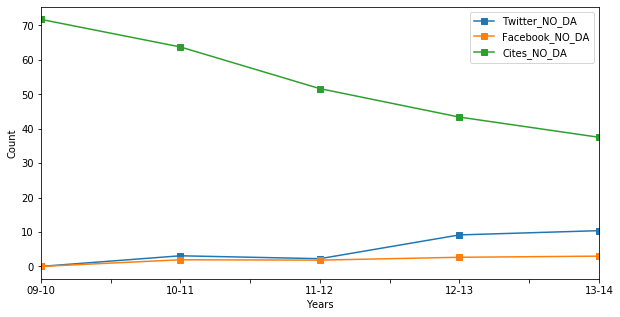

In [15]:
#The previous Pandas DataFrame plotted as a line graph (Information Sciences)

cont_years = ["09-10", "10-11", "11-12", "12-13", "13-14","14-15", "15-16", "16-17", "17-18", "18-19"]

NO_DA_plot = MeansTableNO_DA.plot.line(figsize=(10,5), marker="s")
NO_DA_plot.set_xlabel("Years")
NO_DA_plot.set_ylabel("Count")

In [16]:
#Create a Pandas DataFrame of the resulting means for after the PLOS policy implementation (Information Sciences)

years = ["14-15", "15-16", "16-17", "17-18", "18-19", ]

MeansTableDA = pd.DataFrame(list(zip(TwitterLstDA,FacebookLstDA,CiteLstDA)), 
               columns =['Twitter_DA','Facebook_DA','Cites_DA'], index= years) 

MeansTableDA

,Twitter_DA,Facebook_DA,Cites_DA
14-15,10.957145,7.298510,33.121942
15-16,9.390793,30.698159,28.818980
16-17,13.807001,14.200112,24.474354
17-18,8.779446,0.000000,21.017898
18-19,2.703994,0.000000,15.338392


Text(0, 0.5, 'Count')

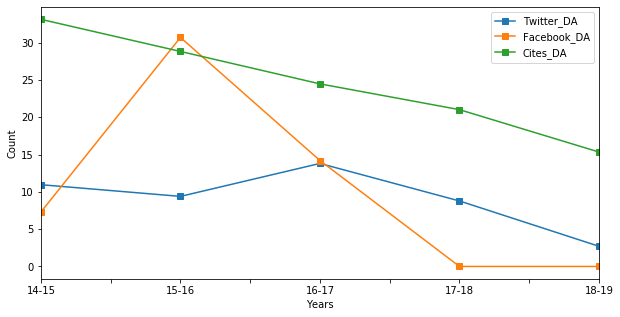

In [17]:
#The Pandas DataFrame plotted in a line graph

DA_plot = MeansTableDA.plot.line(figsize=(10,5), marker="s")
DA_plot.set_xlabel("Years")
DA_plot.set_ylabel("Count")

Text(4.1, 70, 'Policy implementation')

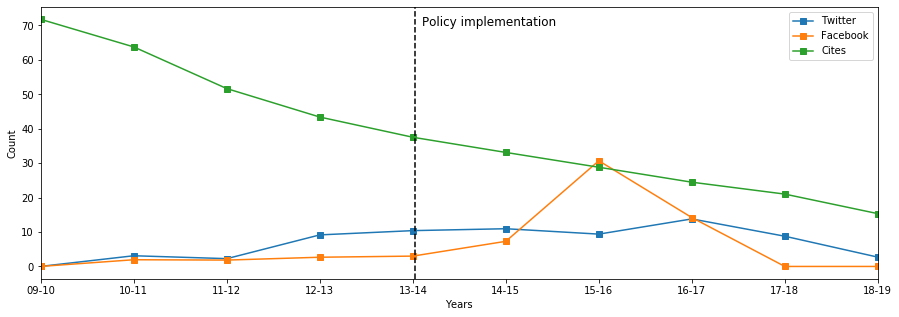

In [38]:
#A plot of the Article Level Metrics for the full 10 year time-period (Information Sciences)

cont_years = ["09-10", "10-11", "11-12", "12-13", "13-14","14-15", "15-16", "16-17", "17-18", "18-19"]

Twitter = TwitterLstNO_DA + TwitterLstDA
Facebook = FacebookLstNO_DA + FacebookLstDA
Cites = CiteLstNO_DA + CiteLstDA

cont_MeansTable = pd.DataFrame(list(zip(Twitter,Facebook,Cites)), 
               columns =['Twitter','Facebook','Cites'], index= cont_years) 

cont_plot = cont_MeansTable.plot.line(figsize=(15,5), marker="s")
cont_plot.set_xlabel("Years")
cont_plot.set_ylabel("Count")
cont_plot.axvline(x=4.025, color="black", linestyle="--")
cont_plot.text(4.10,70, "Policy implementation", horizontalalignment="left", fontsize=12 )

In [39]:
from statsmodels.tsa.stattools import adfuller

In [41]:
#The following three cells execute the Dickey-Fuller test for the three Article Level Metrics

print(adfuller(Twitter))

(-1.8184203337868017, 0.3713556147357153, 0, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, 35.55037340950067)


In [42]:
print(adfuller(Facebook))

(-2.0760459067087034, 0.25425509607355223, 1, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, 48.91099747324906)


In [43]:
print(adfuller(Cites))

(0.0955135685641394, 0.9657534463547764, 3, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 14.9103996120994)


In [2]:
#PLOS API URL collection - Computer and information sciences
#The same steps taken for Social Sciences are repeated.

#First 5 years after the policy introduction
DA1_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2014-03-04T00:00:00Z TO 2015-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA2_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2015-03-04T00:00:00Z TO 2016-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA3_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2016-03-04T00:00:00Z TO 2017-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA4_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2017-03-04T00:00:00Z TO 2018-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
DA5_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2018-03-04T00:00:00Z TO 2019-03-04T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'

#5 Years leading up to the policy introduction
NO_DA5_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2009-03-01T00:00:00Z TO 2010-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA4_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2010-03-01T00:00:00Z TO 2011-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA3_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2011-03-01T00:00:00Z TO 2012-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA2_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2012-03-01T00:00:00Z TO 2013-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'
NO_DA1_CIS = 'http://api.plos.org/search?q=subject_level_1:"Computer and information sciences" AND everything:10.1371 AND publication_date:[2013-03-01T00:00:00Z TO 2014-03-01T23:59:59Z]&fl=id,data_availability,alm_scopusCiteCount,alm_twitterCount,alm_facebookCount&wt=json&indent=on&rows=10000'


In [5]:
numFound_CIS = []

numFound_CIS.append(get_numfound(NO_DA5_CIS))
numFound_CIS.append(get_numfound(NO_DA4_CIS))
numFound_CIS.append(get_numfound(NO_DA3_CIS))
numFound_CIS.append(get_numfound(NO_DA2_CIS))
numFound_CIS.append(get_numfound(NO_DA1_CIS))

numFound_CIS.append(get_numfound(DA1_CIS))
numFound_CIS.append(get_numfound(DA2_CIS))
numFound_CIS.append(get_numfound(DA3_CIS))
numFound_CIS.append(get_numfound(DA4_CIS))
numFound_CIS.append(get_numfound(DA5_CIS))
    
print(numFound_CIS)

[728, 1047, 1884, 2872, 3528, 3137, 3864, 3013, 2894, 2969]


In [8]:
yearsNODA = ["09-10", "10-11", "11-12", "12-13", "13-14"]

NumFoundTableNO_DA_CIS = pd.DataFrame(list(zip(numFound_CIS[0:5])), 
               columns =['Total Publications'], index= yearsNODA) 

NumFoundTableNO_DA_CIS

,Total Publications
09-10,728
10-11,1047
11-12,1884
12-13,2872
13-14,3528


In [9]:
yearsDA = ["14-15", "15-16", "16-17", "17-18", "18-19"]

NumFoundTableDA_CIS = pd.DataFrame(list(zip(numFound_CIS[5:10])), 
               columns =['Total Publications'], index= yearsDA) 

NumFoundTableDA_CIS

,Total Publications
14-15,3137
15-16,3864
16-17,3013
17-18,2894
18-19,2969


In [10]:
cont_years = ["09-10", "10-11", "11-12", "12-13", "13-14","14-15", "15-16", "16-17", "17-18", "18-19"]

NumFoundTable_CIS = pd.DataFrame(list(zip(numFound_CIS)), 
               columns =['Total Publications'], index= cont_years) 

NumFoundTable_CIS

,Total Publications
09-10,728
10-11,1047
11-12,1884
12-13,2872
13-14,3528
14-15,3137
15-16,3864
16-17,3013
17-18,2894
18-19,2969


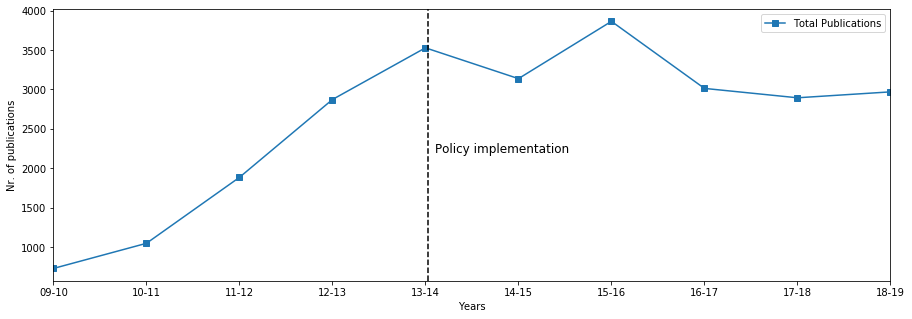

In [14]:
plot_CIS = NumFoundTable_CIS.plot.line(figsize=(15,5), marker="s")
plot_CIS.set_xlabel("Years")
plot_CIS.set_ylabel("Nr. of publications")
plot_CIS.axvline(x=4.025, color="black", linestyle="--")
plot_CIS.text(4.10, 2200, "Policy implementation", horizontalalignment="left", fontsize=12 )
plot_CIS

In [16]:
lstoflstsNO_DA_CIS = []

TwitterLstNO_DA_CIS = []
FacebookLstNO_DA_CIS = []
CiteLstNO_DA_CIS = []

lstoflstsNO_DA_CIS.append(get_means(NO_DA5_CIS))
lstoflstsNO_DA_CIS.append(get_means(NO_DA4_CIS))
lstoflstsNO_DA_CIS.append(get_means(NO_DA3_CIS))
lstoflstsNO_DA_CIS.append(get_means(NO_DA2_CIS))
lstoflstsNO_DA_CIS.append(get_means(NO_DA1_CIS))


for lst in lstoflstsNO_DA_CIS:
    TwitterLstNO_DA_CIS.append(lst[0])
    FacebookLstNO_DA_CIS.append(lst[1])
    CiteLstNO_DA_CIS.append(lst[2])

print(TwitterLstNO_DA_CIS)
print(FacebookLstNO_DA_CIS)
print(CiteLstNO_DA_CIS)


[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[87.1678129298487, 88.87571701720842, 68.74827403080191, 50.332985022640194, 45.544655514601644]


In [17]:
lstoflstsDA_CIS = []

TwitterLstDA_CIS = []
FacebookLstDA_CIS = []
CiteLstDA_CIS = []

lstoflstsDA_CIS.append(get_means(DA1_CIS))
lstoflstsDA_CIS.append(get_means(DA2_CIS))
lstoflstsDA_CIS.append(get_means(DA3_CIS))
lstoflstsDA_CIS.append(get_means(DA4_CIS))
lstoflstsDA_CIS.append(get_means(DA5_CIS))


for lst in lstoflstsDA_CIS:
    TwitterLstDA_CIS.append(lst[0])
    FacebookLstDA_CIS.append(lst[1])
    CiteLstDA_CIS.append(lst[2])

print(TwitterLstDA_CIS)
print(FacebookLstDA_CIS)
print(CiteLstDA_CIS)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[39.75892857142857, 31.086461299508155, 28.064741035856574, 22.901140684410645, 18.72035040431267]


Text(4.1, 70, 'Policy implementation')

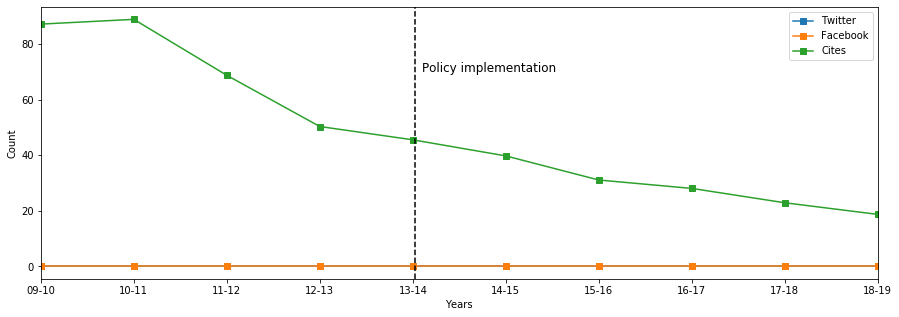

In [18]:
cont_years = ["09-10", "10-11", "11-12", "12-13", "13-14","14-15", "15-16", "16-17", "17-18", "18-19"]

Twitter_CIS = TwitterLstNO_DA_CIS + TwitterLstDA_CIS
Facebook_CIS = FacebookLstNO_DA_CIS + FacebookLstDA_CIS
Cites_CIS = CiteLstNO_DA_CIS + CiteLstDA_CIS

cont_MeansTable_CIS = pd.DataFrame(list(zip(Twitter_CIS,Facebook_CIS,Cites_CIS)), 
               columns =['Twitter','Facebook','Cites'], index= cont_years) 

cont_plot_CIS = cont_MeansTable_CIS.plot.line(figsize=(15,5), marker="s")
cont_plot_CIS.set_xlabel("Years")
cont_plot_CIS.set_ylabel("Count")
cont_plot_CIS.axvline(x=4.025, color="black", linestyle="--")
cont_plot_CIS.text(4.10,70, "Policy implementation", horizontalalignment="left", fontsize=12 )

In [39]:
#A function is created to calculate the percentages for the presence of data availability statements...
#... in the two analyzed scientific fields

def get_data_availability(API_URL):
    url = API_URL
    resp = requests.get(url)
    data = resp.json()
    data = data['response']
    numfound = data['numFound']
    data = data['docs']
    
    counter = 0
    keyword = 'data_availability'
    for x in data10:
        if keyword in x:
            counter += 1
    
    percentage = (counter / numfound) * 100
    
    return percentage

In [41]:
#Retrieving the percentages for the 5 years after the PLOS policy implementation - Social Sciences

DA_percentages = []

DA_percentages.append(get_data_availability(DA1))
DA_percentages.append(get_data_availability(DA2))
DA_percentages.append(get_data_availability(DA3))
DA_percentages.append(get_data_availability(DA4))
DA_percentages.append(get_data_availability(DA5))

print(DA_percentages)

[42.865023905847735, 33.01232120096304, 43.62717574396407, 44.85279969213008, 40.65224973840251]


In [43]:
#Retrieving the percentages for the 5 years after the PLOS policy implementation - Computer & Information Sciences

DA_percentagesCIS = []

DA_percentagesCIS.append(get_data_availability(DA1_CIS))
DA_percentagesCIS.append(get_data_availability(DA2_CIS))
DA_percentagesCIS.append(get_data_availability(DA3_CIS))
DA_percentagesCIS.append(get_data_availability(DA4_CIS))
DA_percentagesCIS.append(get_data_availability(DA5_CIS))

print(DA_percentagesCIS)

[74.30666241632132, 60.32608695652174, 77.36475273813474, 80.54595715272978, 78.51128326035702]


In [45]:
#Show resulting percentages in Pandas DataFrame

DAyears = ["14-15", "15-16", "16-17", "17-18", "18-19"]

DApercentageTable = pd.DataFrame(list(zip(DA_percentages, DA_percentagesCIS)), 
               columns =['Social Sciences','Computer & Information Sciences'], index= DAyears) 

DApercentageTable

,Social Sciences,Computer & Information Sciences
14-15,42.865024,74.306662
15-16,33.012321,60.326087
16-17,43.627176,77.364753
17-18,44.852800,80.545957
18-19,40.652250,78.511283


Text(0, 0.5, 'Percentage of data availability statements')

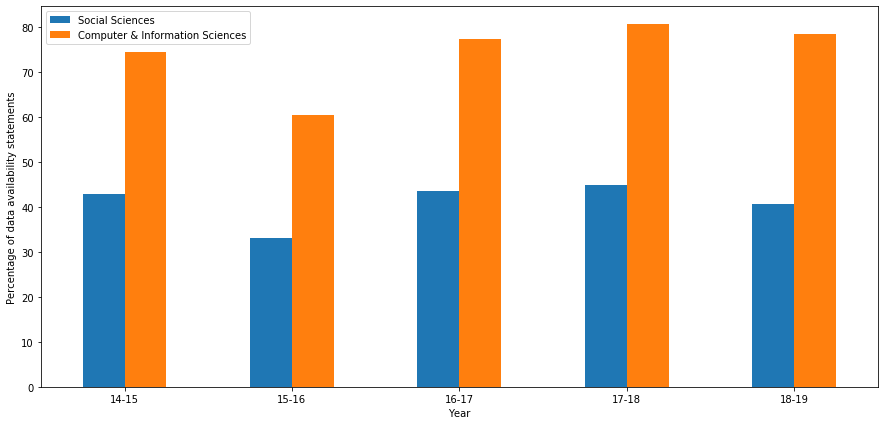

In [52]:
#A bar plot is created for the Pandas Datframe in the previous cell

ax = DApercentageTable.plot.bar(rot=0, figsize=(15,7))
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of data availability statements")